In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# numerical integration

we will be using the following function:

In [106]:
def examined_function(x):
    if x <= 2:
        return 2*(x**2)
    else:
        return -((x-4)**3)/2 + 4

and the following starting values: (we will be integrating from 0 to 6 in five steps)

In [107]:
x_start = 0
x_end = 6
number_of_points = 5

# ==>
step_length = (x_end - x_start) / (number_of_points - 1)

lets make the dataframe with the 

In [108]:
values_function_graph = pd.Series()

for x in range((x_end - x_start) * 100 + 1):
    xx = x/100
    values_function_graph[xx] = examined_function(xx)

In [109]:
values_points = pd.Series()

for x in range(number_of_points):
    values_points[x_start + step_length * x] = examined_function(x_start + step_length * x)

this is how our function looks like including the points for our approximation:

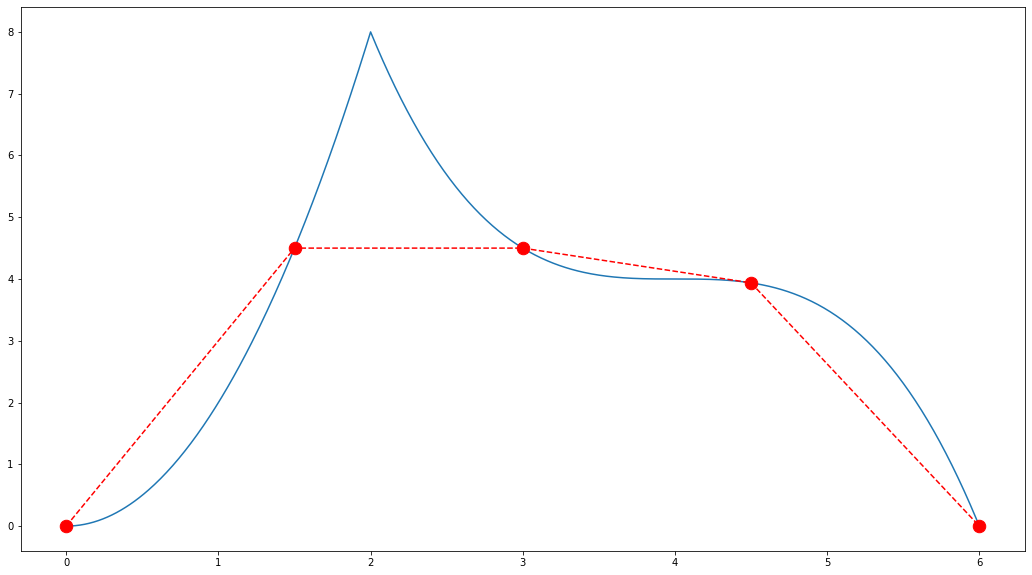

In [110]:
plt.plot( values_function_graph)
plt.plot( values_points,'.--r' ,ms=25)
plt.gcf().set_size_inches(18,10)

### exact result of the integration

the exact result of the integration is:

$\int_{a}^{b}examined function$

$= \int_{a}^{b}2x^{2} \;\;  +  \;\; \int_{b}^{c}-\frac{1}{2}(x-4)^{3}+4$

$= \left[\frac{2}{3}x^{3} + c \right ]_{a}^{b} \;\; + \;\; \left[-\frac{1}{8}(x-4)^{4}+4x + c\right ]_{b}^{c}$
* $a = x_{start} = 0$
* $b = 2$
* $c = x_{end} = 6$

$= ((\frac{2}{3}2^{3} + c) - (0 + c)) \; + \; ((\frac{1}{8}(6-4)^{4}+4*6 + c) - (\frac{1}{8}(2-4)^{4}+4*2 + c))$

$=$

In [111]:
exact_integral_value = ((2/3)*2**3) + (((1/8)*2**4 + 24) - ((1/8)*(-2)**4 + 8))
exact_integral_value

21.333333333333332

### linear approximation result

we will calculate the integral value by calculating the volume of each individual segment using the following equation  $(x_{n+1} - x_n) \;*\; \frac{1}{2}(\:f(x_n) + f(x_{n+1})\:)$
and then adding the segment values

lets calculate the result of the linear approximation:

In [112]:
lineap_approx_value = 0
for x in range(values_points.size - 1):
    lineap_approx_value += step_length * abs(values_points.iat[x] + values_points.iat[x+1]) / 2
    
lineap_approx_value

19.40625

calculating the error:

In [113]:
percent_error = (1 - lineap_approx_value / exact_integral_value) * 100
print ("the error is: %.2f %%" %(percent_error))

the error is: 9.03 %


### my idea for improving the linear approximation

if it follows for two consecutive approximation points, that: $\left |  f(\frac{x_n+x_{n+1}}{2}) - \frac{f(x_n) + f(x_{n+1})}{2} \right| \; > \; $ max_distance_to_function

then a new approximation point $\frac{x_n+x_{n+1}}{2}$ should be automatically introduced

lets calculate the new values_points series:

In [114]:
max_distance_to_function = 1

In [115]:
x_values_points_list = []
x_values_points_list.append(x_start)
x_n = x_n_plus_1 = x_start
index_counter = 0

while x_n < x_end:
    if len(x_values_points_list) > index_counter + 1:
        x_n_plus_1 = x_values_points_list[index_counter + 1]
    else:
        x_n_plus_1 = x_n + step_length
        x_values_points_list.insert(index_counter + 1, x_n_plus_1)
    if x_n_plus_1 <= x_end:
        while max_distance_to_function < abs(examined_function((x_n + x_n_plus_1)/2) \
                                             - (examined_function(x_n) + examined_function(x_n_plus_1))/2):
            x_n_plus_1 = (x_n + x_n_plus_1)/2
            x_values_points_list.insert(index_counter + 1, x_n_plus_1)
    
    x_n = x_n_plus_1
    index_counter += 1
    
x_values_points_list.append(x_end)

In [116]:
values_points = pd.Series()

for x in x_values_points_list:
    values_points[float(x)] = examined_function(x)

lets plot the new values_points series

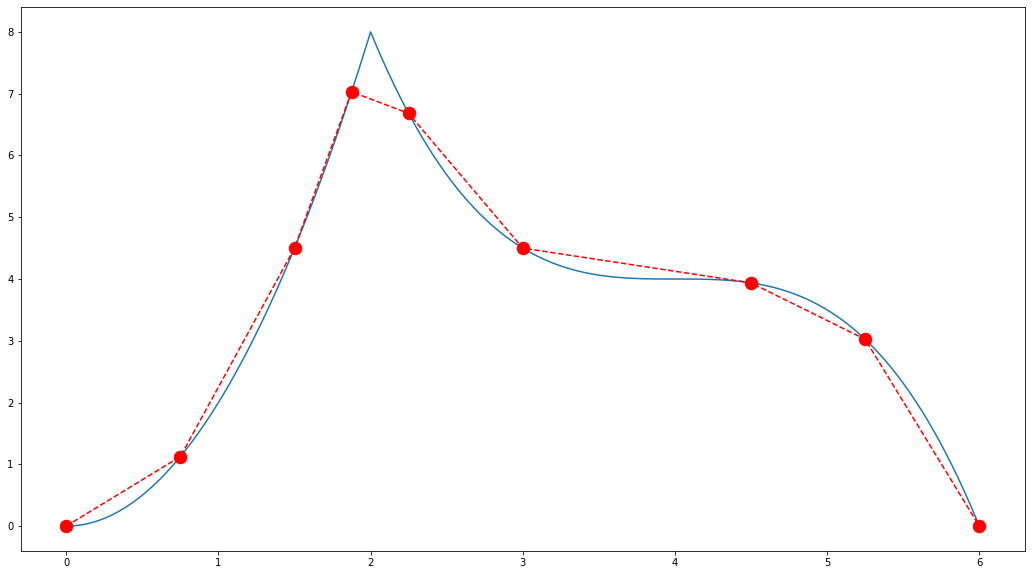

In [117]:
plt.plot( values_function_graph)
plt.plot( values_points,'.--r' ,ms=25)
plt.gcf().set_size_inches(18,10)

as we can see, the regions of high absolute value of the function derivative have seen an automatic increase in approximation point density - just as intended.

lets now calculate the new integral value

In [118]:
linear_approx_value = 0
index_counter = 0
for x in x_values_points_list:
    if x < x_end:
        linear_approx_value += (x_values_points_list[index_counter + 1] - x) \
        * abs(examined_function(x) + examined_function(x_values_points_list[index_counter + 1])) / 2
        index_counter += 1
linear_approx_value

21.52880859375

and the error

In [119]:
percent_error = abs((1 - linear_approx_value / exact_integral_value)) * 100
print ("the error is: %.2f %%" %(percent_error))

the error is: 0.92 %


# simpson rule

lets see if the simpson rule is better at approximating the integral value than my method while using the same number of points

In [120]:
number_of_points = 9

the simpson rule suggests approximating the function graph for three consecutive x-values, $x_n \; , \; x_{n+\Delta x} \; and \; x_{n+2\Delta x}\;$, by using a parabola of the form $\; ax^2+bx+c\;$, which goes trough those points.

the equation used to approximate the integral value between the function value of the first point $f(x_n)$ and the third point $f(x_{n+2\Delta x})$ equals:
$$\int_{x_n}^{x_n+2\Delta x}f(x) \; \approx  \;  \int_{x_n}^{x_n+2\Delta x}ax^2+bx+c \;=\;\frac{\Delta x}{3}(f(x_{n})+4f(x_{n+\Delta x})+f(x_{n+2\Delta x}))$$

so lets calculate the integral value using the right side of this equation.

for this we will first make a new list with the x-values of our approximation points

In [121]:
x_values_points_list = []
step_length = (x_end - x_start)/(number_of_points - 1)

for x in range(number_of_points):
    x_values_points_list.append(x_start + step_length * x)

x_values_points_list

[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6.0]

now we can calculate the integral value:

In [122]:
x_n = x_start
simpson_approx_value = 0

while x_n < x_end:
    simpson_approx_value += (examined_function(x_n) \
                             + 4*examined_function(x_n + step_length) \
                             + examined_function(x_n + 2*step_length)) * step_length / 3
    x_n += 2*step_length
    
simpson_approx_value

21.3046875

calculating the error:

In [123]:
percent_error = abs((1 - simpson_approx_value / exact_integral_value)) * 100
print ("the error is: %.2f %%" %(percent_error))

the error is: 0.13 %


# monte carlo integration

we can also integrate using random numbers

by introducing a number of random points to an rectangular area of the diagram and then by calculating the fraction of the points lying in between the x-axis and the function graph we can estimate the integral value of the function inside this area by being the same fraction of the overall random point amount.

we will place the rectangular area from the point (0,0) to the point (6,8) meaning, that the x-coordinates of our random points will be anywhere from 0 to 6 and the y-coordinates anywhere from 0 to 8.

so first lets make our points and plot them:

In [124]:
points_below_graph = pd.Series()
points_above_graph = pd.Series()
number_random_points = 1000
y_min = 0
y_max = 8

for x in range(number_random_points):
    x_coordinate = np.random.uniform(x_start,x_end)
    y_coordinate = np.random.uniform(y_min,y_max)
    if y_coordinate <= examined_function(x_coordinate):
        points_below_graph[x_coordinate] = y_coordinate
    else:
        points_above_graph[x_coordinate] = y_coordinate

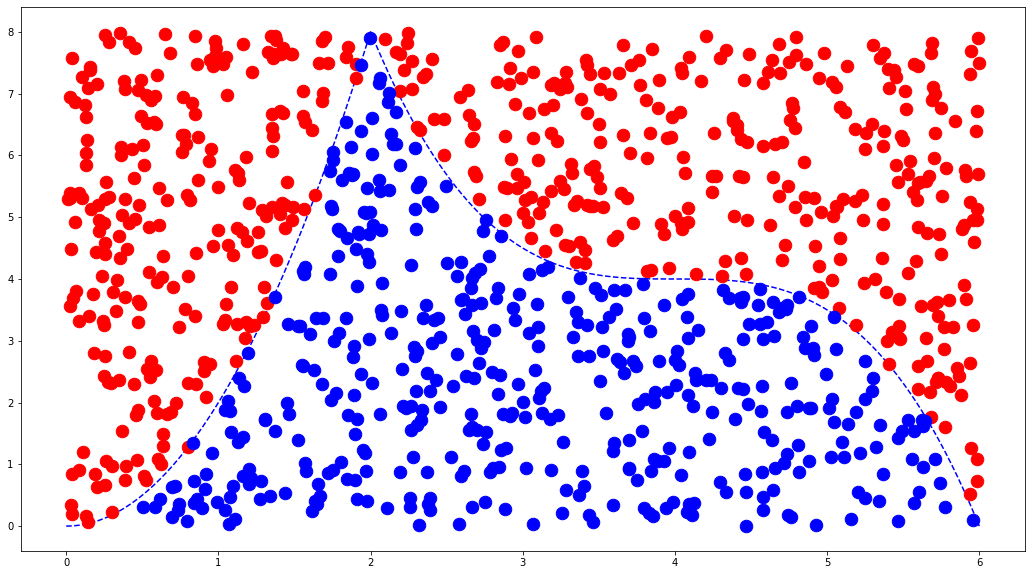

In [125]:
plt.plot( values_function_graph,'--b', )
plt.plot( points_above_graph,'.r' ,ms=25)
plt.plot( points_below_graph,'.b' ,ms=25)
plt.gcf().set_size_inches(18,10)

the proportion of the points below the graph is:

In [126]:
proportion_below_to_all = points_below_graph.size / number_random_points
proportion_below_to_all 

0.441

now we can calculate the integral value by multiplying the overall area by this fraction:

In [127]:
random_approx_value = (x_end - x_start) * (y_max - y_min) * proportion_below_to_all
random_approx_value

21.168

and calculate the error:

In [128]:
percent_error = abs((1 - random_approx_value / exact_integral_value)) * 100
print ("the error is: %.2f %%" %(percent_error))

the error is: 0.78 %
